In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv(r'/Users/lars/Documents/GitHub/NLP-Social-Media-Mining-for-Health-Monitoring/datasets/Task 1/task2_en_training.tsv', sep = '\t')
#df = df.drop(['tweet_id','user_id'],axis=1)
df


,tweet_id,user_id,class,tweet
0,344266386467606528,809439366,0,"depression hurts, cymbalta can help"
1,349220537903489025,323112996,0,"@jessicama20045 right, but cipro can make thin..."
2,351421773079781378,713100330,0,@fibby1123 are you on paxil .. i need help
3,326594278472171520,543113070,0,@redicine the lamotrigine and sjs just made ch...
4,345567138376994816,138795534,0,have decided to skip my #humira shot today. my...
...,...,...,...,...
20539,469009954251481088,23177032,1,@hornetweb my mri scan shows when it happens b...
20540,468518427125358592,1961096371,1,remember 2003. vioxx costs $65m to ontario dru...
20541,512254891361075200,321391071,1,asians are at higher risk for severe allergic ...
20542,491775200610893825,2484689840,1,5. so what caused the #estrogen surges in #nuv...


In [40]:
df['tweet_id'].value_counts()

349122379827519488    2
348514777183690752    2
431470173992673280    2
362765660461346817    2
348550250304258048    2
                     ..
433126548875784192    1
452792212842364928    1
452923151068827648    1
447414277574758400    1
535492308817682432    1
Name: tweet_id, Length: 20531, dtype: int64

### Average Number of Tweets per User

In [38]:
sum(list(dict(df['user_id'].value_counts()).values())) / len(list(dict(df['user_id'].value_counts()).values()))

1.2693234476367006

### Highly Imbalanced Dataset<br>
We will have to address this.<br>
We can explore creating synthetic data, using TOMEK-Links, etc.

<AxesSubplot:>

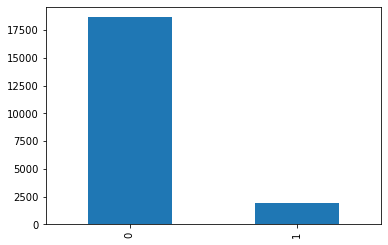

In [66]:
df['class'].value_counts().plot(kind='bar')

### Addressing Duplicate Tweets<br>
We must remove duplicate rows to avoid redundancy and model overfitting

In [73]:
len(df.index) - df['tweet'].nunique()

328

<AxesSubplot:>

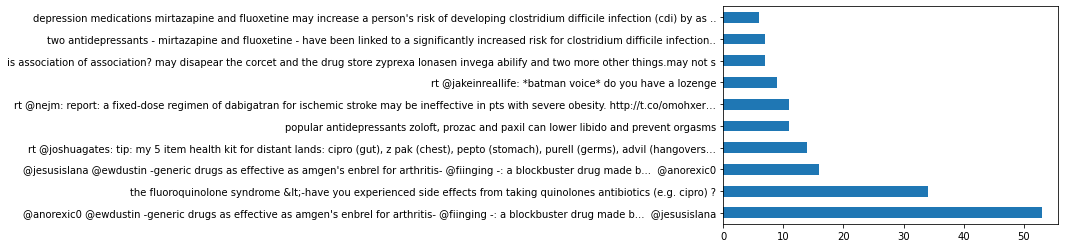

In [69]:
df['tweet'].value_counts()[:10].plot(kind='barh')

### Tweets belonging to class 1 are 8.9 characters longer on average

In [41]:
zero = [0,0]
one = [0,0]

for index, row in df.iterrows():
    if row['class'] == 0:
        zero[0] += 1
        zero[1] += len(row['tweet'])
    else:
        one[0] += 1
        one[1] += len(row['tweet'])

In [58]:
(one[1] / one[0]) - (zero[1] / zero[0])

8.911337185168918